In [7]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from IPython.display import display, Markdown
from wordcloud import WordCloud
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
from src.features.preprocessing import preprocess_df
from src.features.build_features_svm import param_grid_search, predict_test

Fitting 5 folds for each of 155 candidates, totalling 775 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.681 total time=   1.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.695 total time=   1.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.699 total time=   1.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.703 total time=   1.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.704 total time=   1.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.789 total time=   0.8s
[CV 2/5] END ................C=1, kernel=linear;, score=0.784 total time=   0.8s
[CV 3/5] END ................C=1, kernel=linear;, score=0.776 total time=   0.8s
[CV 4/5] END ................C=1, kernel=linear;, score=0.787 total time=   0.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.796 total time=   0.8s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.752 total time=   1.0s
[CV 2/5] END ...............C=10, kernel=linea

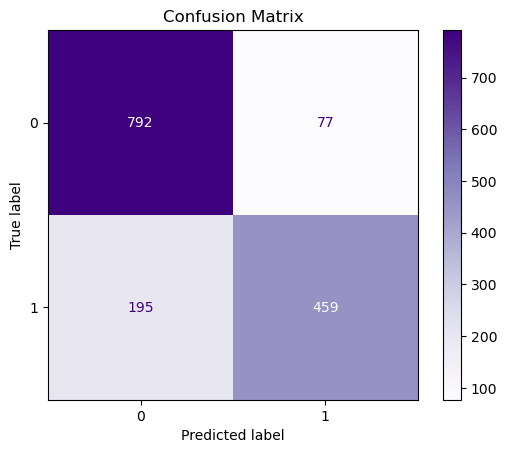

In [3]:
from src.features.build_features_svm import param_grid_search, predict_test
df_train = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/train.csv')
df_test = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/test.csv')

predictions, grid_results, y_val, y_pred_val = predict_test(df_train, df_test)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Get confusion matrix values
tn, fp, fn, tp = cm.ravel()

'''Annotate the plot with TP, FP, TN, FN
plt.text(0, 0, f'TN = {tn}', va='center', ha='center', color='black', fontsize=10)
plt.text(0, 1, f'FP = {fp}', va='center', ha='center', color='black', fontsize=10)
plt.text(1, 0, f'FN = {fn}', va='center', ha='center', color='black', fontsize=10)
plt.text(1, 1, f'TP = {tp}', va='center', ha='top', color='black', fontsize=10)'''

plt.show()


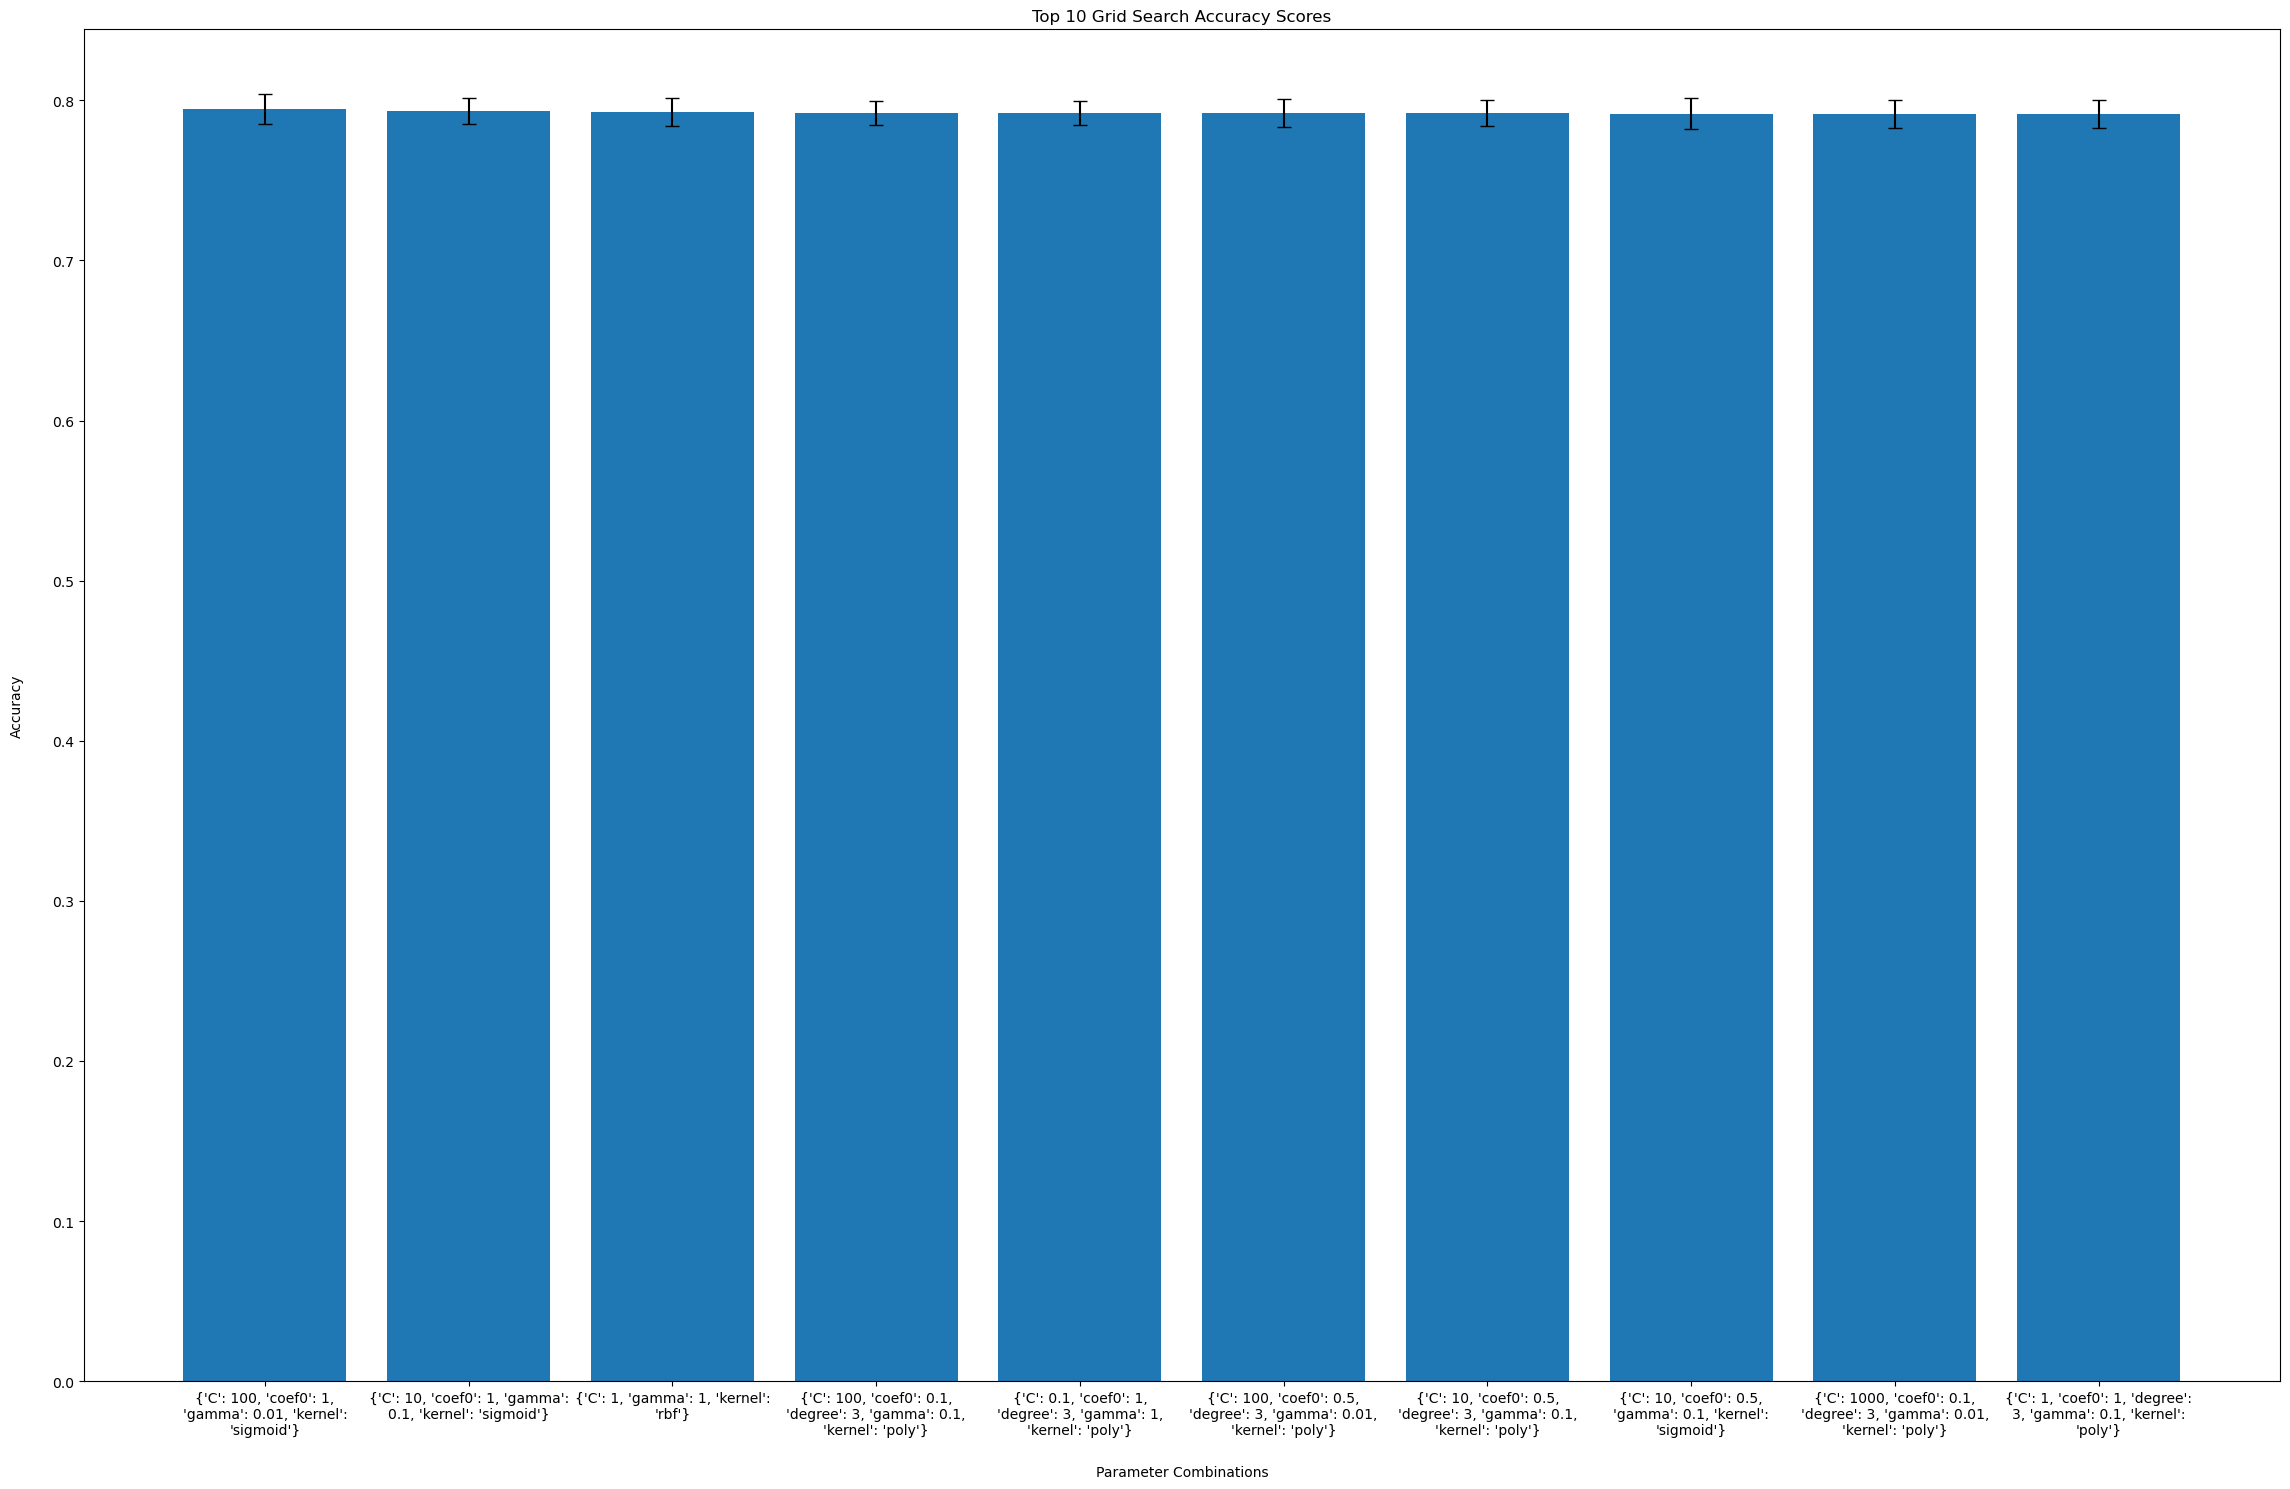

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Load the grid search results
grid_results = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/grid_search_results.csv')
grid_results = grid_results.sort_values("mean_test_score", ascending=False).head(10)

# Extract relevant data for plotting
mean_test_scores = grid_results['mean_test_score']
std_test_scores = grid_results['std_test_score']
params = grid_results['params']

# Function to wrap text for better readability
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrap the parameters
wrapped_params = wrap_labels(params, 30)  # Adjust the width as needed

# Create a bar plot with error bars
plt.figure(figsize=(23, 15))
plt.bar(range(len(mean_test_scores)), mean_test_scores, yerr=std_test_scores, capsize=5)
plt.xticks(range(len(wrapped_params)), wrapped_params, rotation=0, ha='center', fontsize=10)
plt.xlabel('Parameter Combinations', labelpad=20)
plt.ylabel('Accuracy', labelpad=20)
plt.title('Top 10 Grid Search Accuracy Scores')
plt.tight_layout()
plt.show()

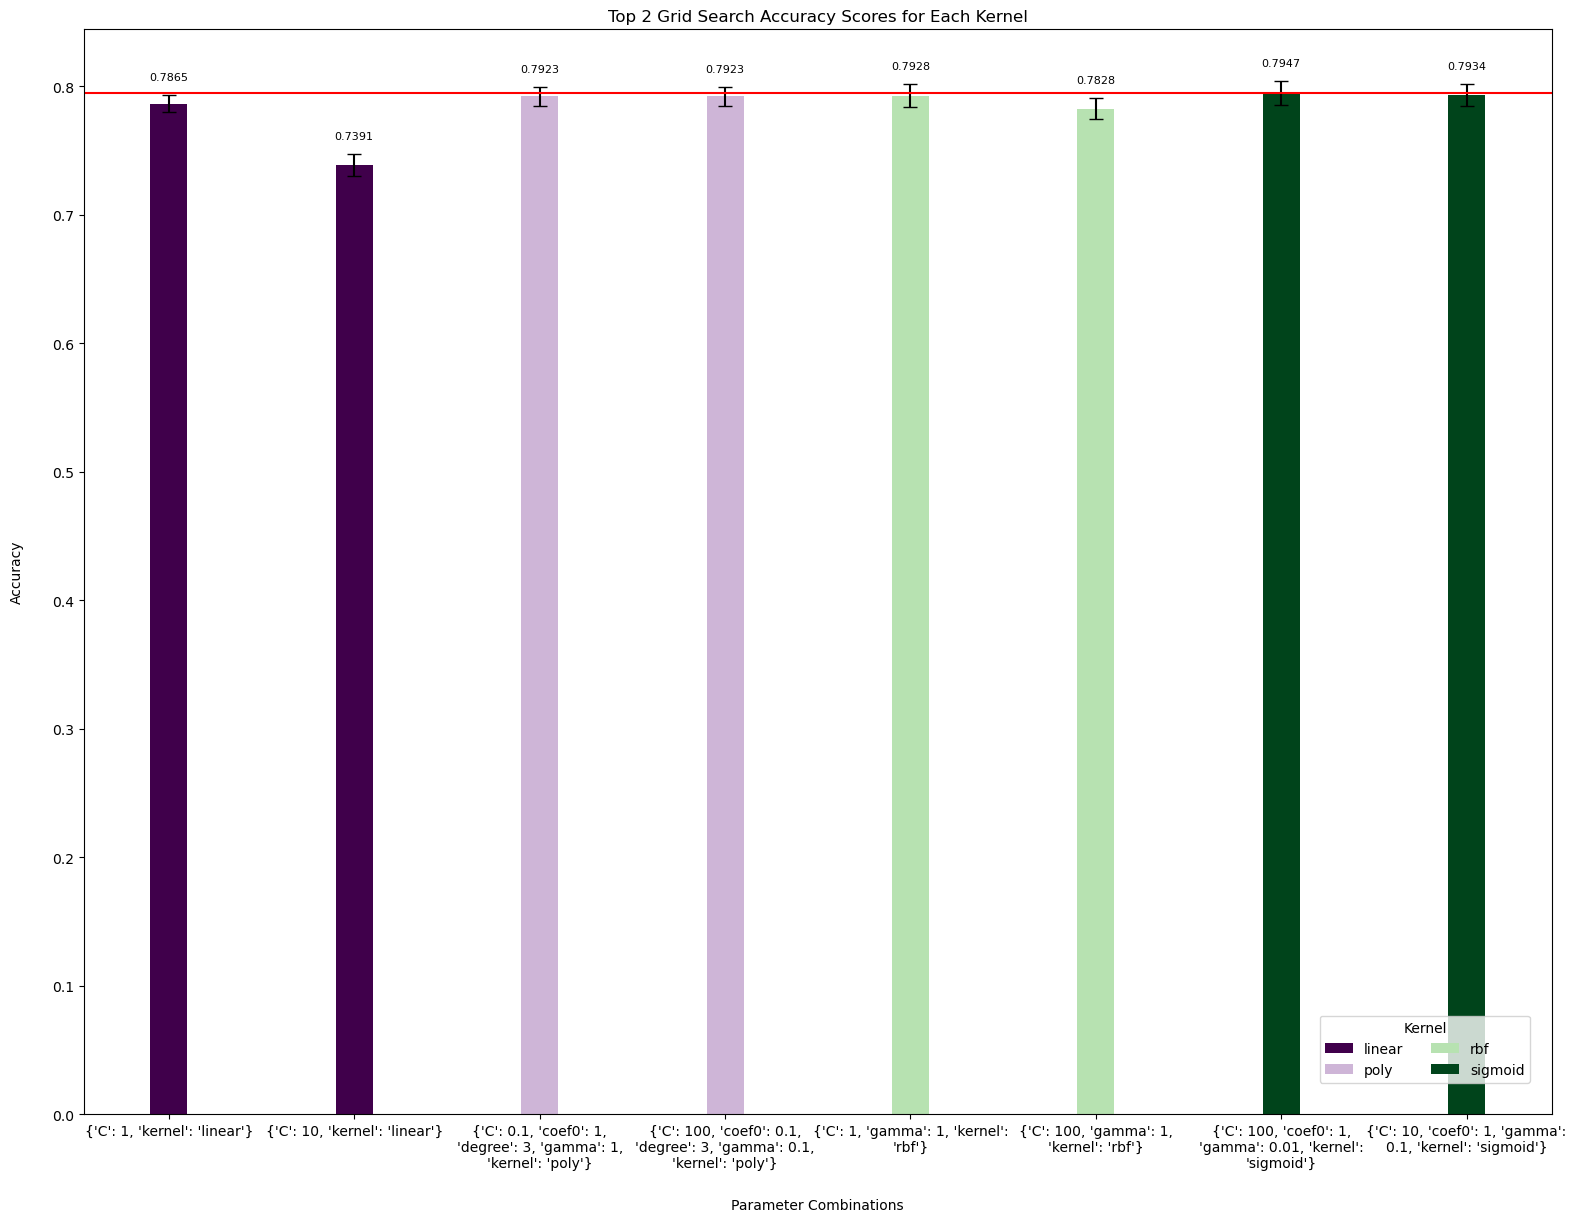

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Load the grid search results
grid_results = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/grid_search_results.csv')

# Extract the kernel information from params
grid_results['kernel'] = grid_results['params'].apply(lambda x: eval(x)['kernel'])

# Sort and get the best 2 parameter combinations for each kernel
best_per_kernel = grid_results.groupby('kernel').apply(lambda x: x.nlargest(2, 'mean_test_score')).reset_index(drop=True)

# Extract relevant data for plotting
mean_test_scores = best_per_kernel['mean_test_score']
std_test_scores = best_per_kernel['std_test_score']
params = best_per_kernel['params']
kernels = best_per_kernel['kernel']

# Function to wrap text for better readability
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrap the parameters
wrapped_params = wrap_labels(params, 30)  # Adjust the width as needed

# Create a bar plot with error bars and different colors for each kernel
plt.figure(figsize=(16, 16))
unique_kernels = best_per_kernel['kernel'].unique()
colors = plt.cm.PRGn(np.linspace(0, 1, len(unique_kernels)))

# Calculate the positions for each bar
bar_width = 0.2
positions = np.arange(len(wrapped_params))

# Plot bars for each kernel
for i, kernel in enumerate(unique_kernels):
    indices = best_per_kernel[best_per_kernel['kernel'] == kernel].index
    plt.bar(positions[indices], mean_test_scores[indices], yerr=std_test_scores[indices], capsize=5, width=bar_width, label=kernel, color=colors[i])
    
max_score = mean_test_scores.max()
plt.axhline(y=max_score, color='r', linestyle='-', linewidth=1.5)
#plt.text(1, max_score, f'Max Score: {max_score:.4f}', color='black', ha='right', va='top')


# Adjust the x-axis ticks and labels
plt.xticks(positions, wrapped_params, rotation=0, ha='center', fontsize=10)

# Add some padding to the x-axis label
plt.xlabel('Parameter Combinations', labelpad=20)
plt.ylabel('Accuracy', labelpad=20)
plt.title('Top 2 Grid Search Accuracy Scores for Each Kernel')
plt.legend(title='Kernel', loc='right', bbox_to_anchor=(0.99, 0.06), ncol=2)
plt.tight_layout()

# Add padding to the bottom of the plot to separate x-axis labels from the x-axis
plt.subplots_adjust(bottom=0.3)

# Add value labels to each bar
for i, kernel in enumerate(unique_kernels):
    indices = best_per_kernel[best_per_kernel['kernel'] == kernel].index
    for j in indices:
        plt.text(positions[j], mean_test_scores[j] + std_test_scores[j] + 0.01, f'{mean_test_scores[j]:.4f}', ha='center', va='bottom', fontsize=8, color='black')

plt.show()


5. Distribution of Predictions

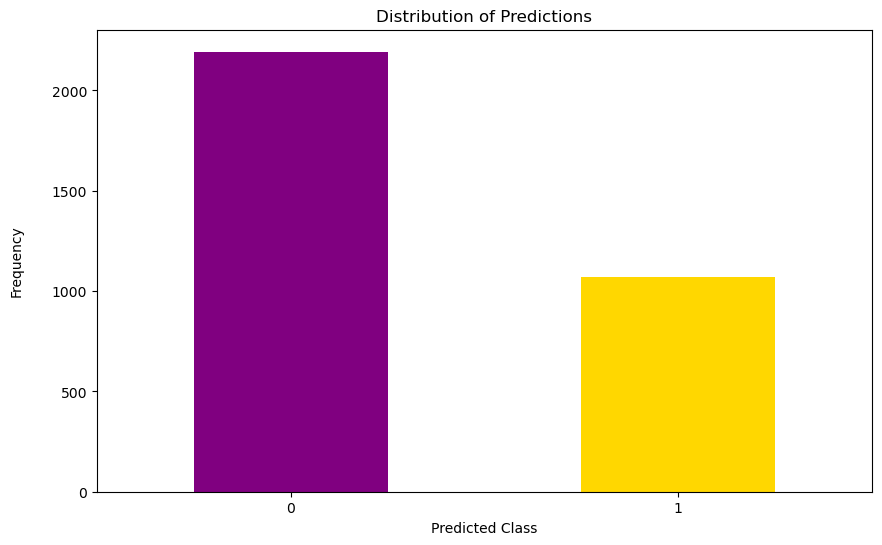

In [13]:
# Load the predictions
predictions_df = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/predictions.csv')
colors = ['purple', 'gold']

# Plot the distribution of predictions
plt.figure(figsize=(10, 6))
predictions_df['predictions'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Predicted Class')
plt.ylabel('Frequency', labelpad=20)
plt.title('Distribution of Predictions')
plt.xticks(rotation=0)
plt.show()

In [114]:
# Load the predictions
predictions_df = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/predictions.csv')

# Function to display examples for a given class
def display_examples(class_label, examples):
    display(pd.DataFrame(examples, columns=[f'Examples for Predicted Class {class_label}']))

# Display example predictions
num_examples = 5
for class_label in predictions_df['predictions'].unique():
    display(Markdown(f"#### Examples for Predicted Class {class_label}"))
    examples = predictions_df[predictions_df['predictions'] == class_label]['text'].head(num_examples)
    display_examples(class_label, examples.tolist())
    display(Markdown("\n"))

#### Examples for Predicted Class 1

,Examples for Predicted Class 1
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


#### Examples for Predicted Class 0

,Examples for Predicted Class 0
0,They'd probably still show more life than Arse...
1,Hey! How are you?
2,What a nice hat?
3,Fuck off!
4,No I don't like cold!


## Class 1
### Examples for Predicted Class 1

,Examples for Predicted Class 1
0,just happened a terrible car crash
1,heard about earthquake is different city stay ...
2,there is a forest fire at spot pond goose are ...
3,apocalypse lighting spokane wildfire
4,typhoon soudelor kill in china and taiwan


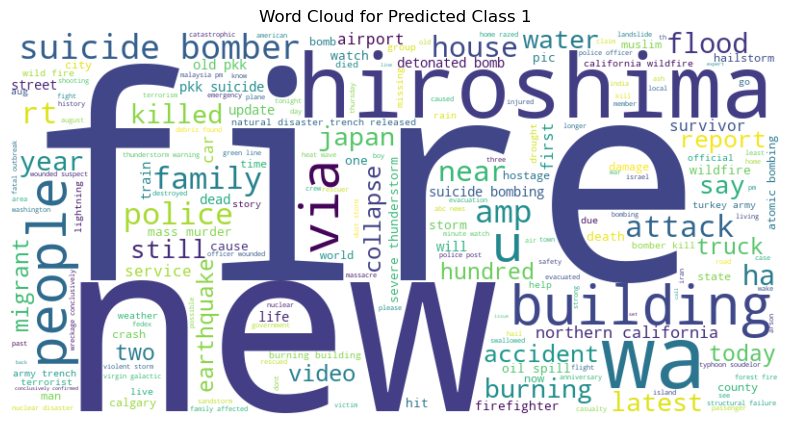

## Class 0
### Examples for Predicted Class 0

,Examples for Predicted Class 0
0,theyd probably still show more life than arsen...
1,hey how are you
2,what a nice hat
3,fuck off
4,no i dont like cold


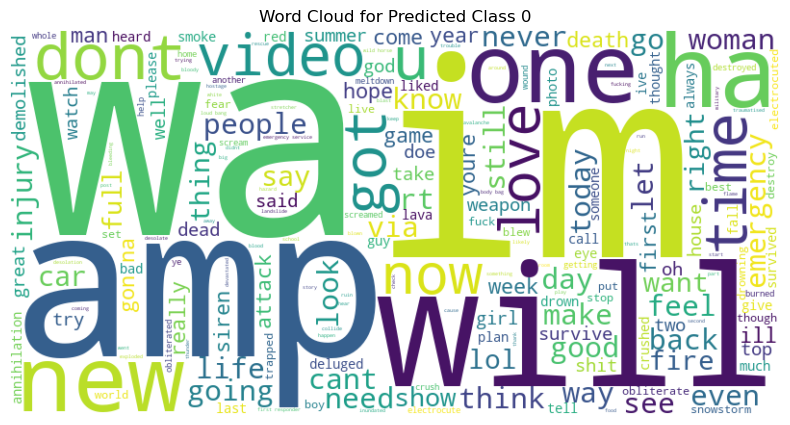

In [118]:
# Load the predictions
import pandas as pd
from IPython.display import display, Markdown
from wordcloud import WordCloud
import matplotlib.pyplot as plt

predictions_df = pd.read_csv('/Users/oyabazer/Documents/Uni/Data Science in Practice/NLP_Disaster_Tweets/docs/predictions.csv')

# Function to display examples for a given class
def display_examples(class_label, examples):
    display(pd.DataFrame(examples, columns=[f'Examples for Predicted Class {class_label}']))

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display example predictions and word clouds
num_examples = 5
for class_label in predictions_df['predictions'].unique():
    display(Markdown(f"## Class {class_label}\n### Examples for Predicted Class {class_label}"))
    examples = predictions_df[predictions_df['predictions'] == class_label]['text_processed'].head(num_examples)
    display_examples(class_label, examples.tolist())
    class_text = ' '.join(predictions_df[predictions_df['predictions'] == class_label]['text_processed'])
    generate_wordcloud(class_text, f'Word Cloud for Predicted Class {class_label}')
    display(Markdown("\n"))